In [1]:
import pandas as pd
import numpy as np

Pour reference:
http://www.fao.org/faostat/fr/#data

# Read.me 
Pour utiliser ce notebook, des tables csv doivent etre telechargees du site fao.org. http://www.fao.org/faostat/fr/#data

Ici, une erreur a ete faite initialement en telechargeant les donnees en Francais pour la premiere table et en telechargeant les donnees en anglais pour les tables suivantes. Aussi avec des donnees uniquement en anglais les premieres requetes poseront peut etre probleme pour les filtrages sur les noms de pays, neanmoins par la suite les jointures etant faites sur les cles candidates que sont les codes pays, les autres requetes ne devrait pas lever d'erreur.

Dans la section Bilans alimentaire
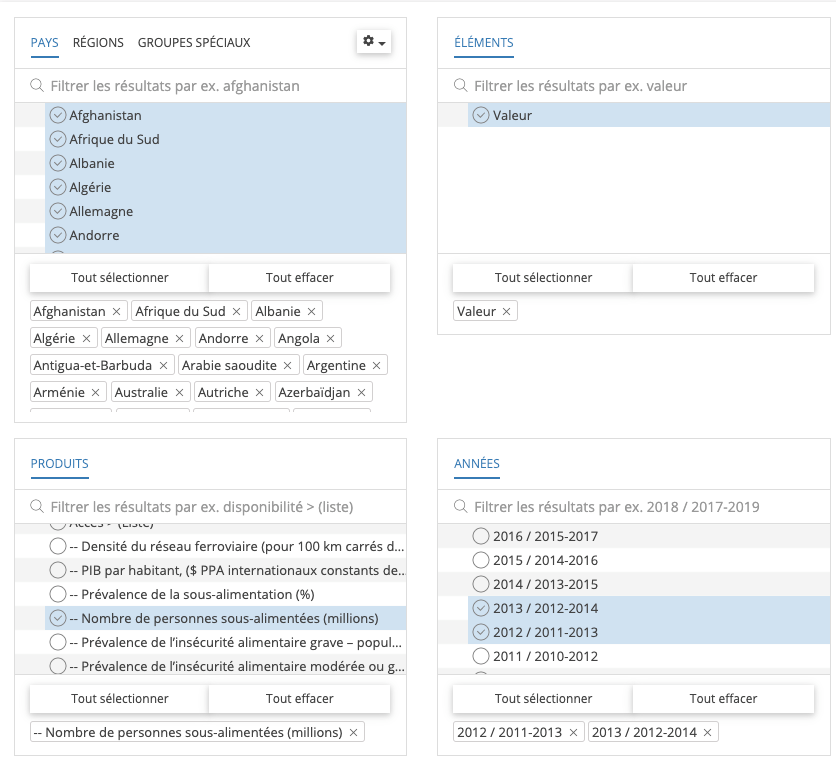

On retrouve les sections et filtres suivants pour la table population_world_2013.csv:
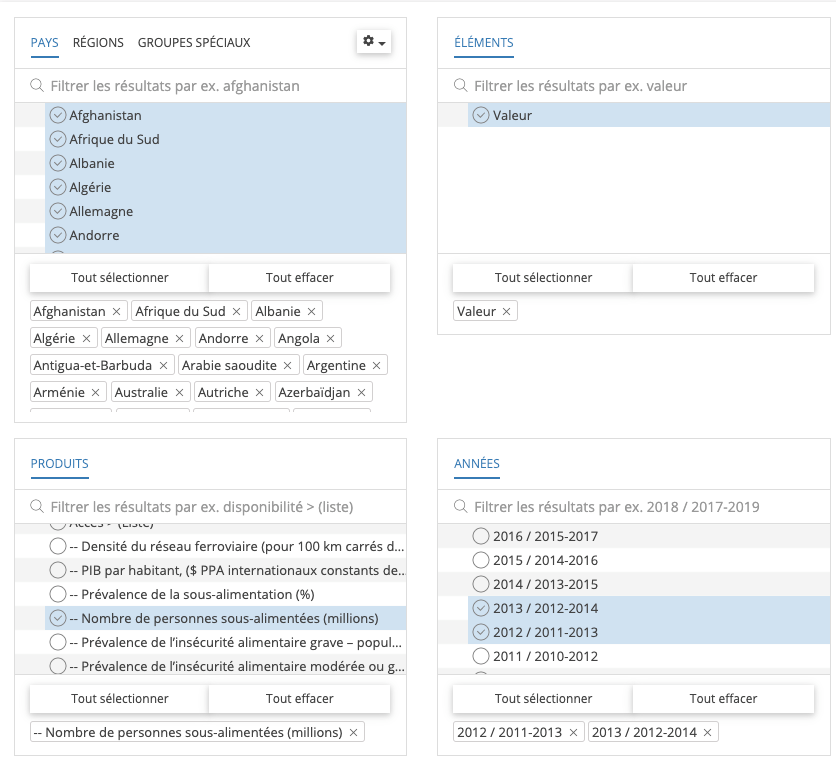
Note: on selectionne tous les pays

On retrouve les sections et filtres suivants pour la table veg.csv:
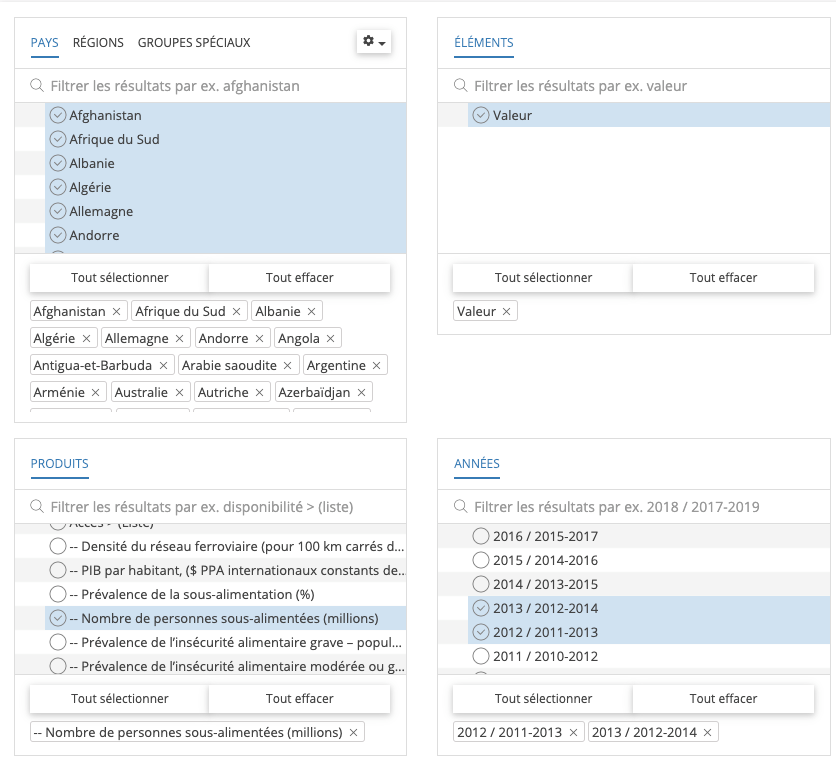
Note: Ici on retire 'Population globale' et 'Disponibilite de matiere grasse' de la section en haut a droite. Pour la liste des vegetaux il faut utiliser l'onglet 'Groupe de produits' dans la section en bas a gauche. Aussi on selectionne tous les pays

On retrouve les sections et filtres suivants pour la table ani.csv:
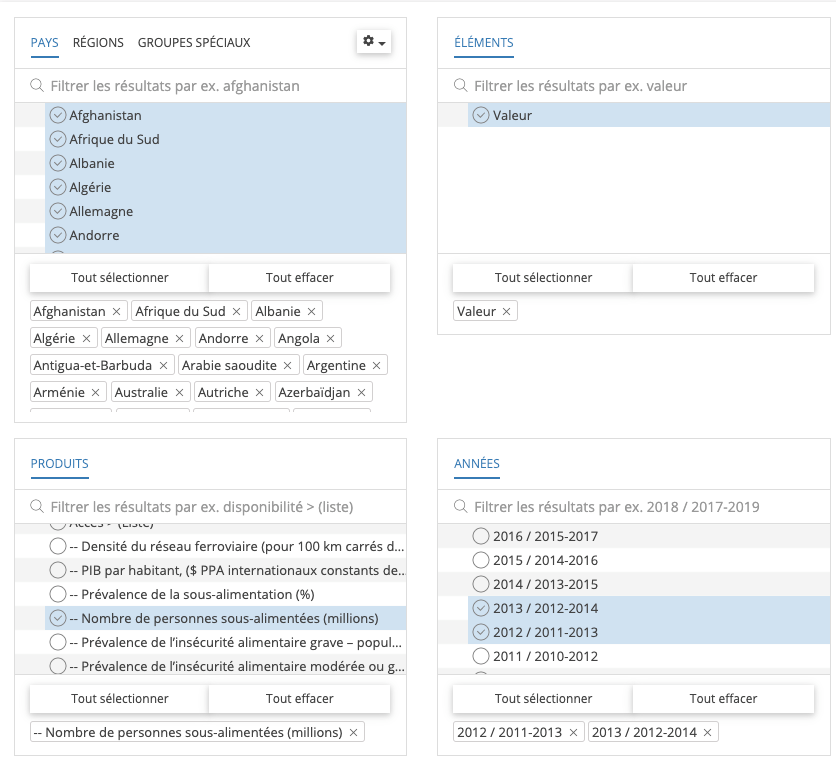
Note: Ici on retire 'Population globale' et 'Disponibilite de matiere grasse' de la section en haut a droite. Pour la liste des vegetaux il faut utiliser l'onglet 'Groupe de produits' dans la section en bas a gauche. Aussi on selectionne tous les pays

Pour la derniere table 'undernourrished.csv' on utilise la section 'Donnees de la securite alimentaire' sur la page precedente, et on utilise les sections et filtres suivants:
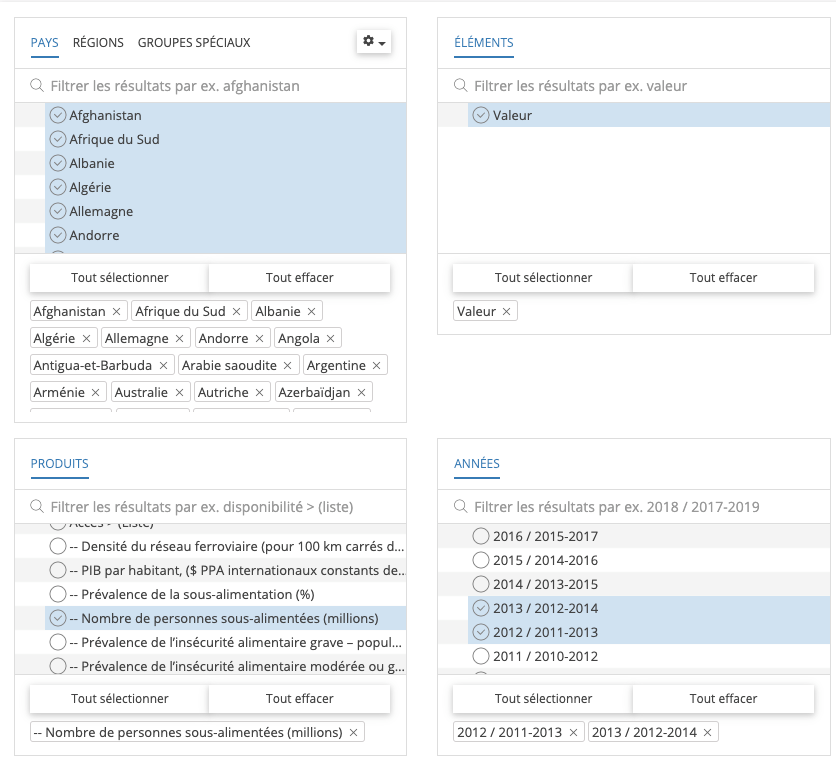
Note: On selectionne tous les pays


Enfin pour la derniere section, un container docker postgres a ete utilise en montant un volume sur le repertoire de travail pour avoir a disposition les fichiers csv (realise sous Mac, sous Windows d'autres etapes sont necessaires)

# Question 1

Donnez le résultat de votre calcul pour l'année 2013, ainsi que pour la dernière année  disponible au jour où vous effectuez ce projet.

In [2]:
# Loading csv file
population = pd.read_csv("population_world_2013.csv")


In [3]:
# Rebranding significant columns
population.columns = ["xx1", "source", "id", "pays", "code", "element", "xx3", "type", "year", "yearbis", "unit", "value", "xx6", "xx7"]
#population.set_index('pays', inplace=True)
population.loc[population["pays"]=="France"]

,xx1,source,id,pays,code,element,xx3,type,year,yearbis,unit,value,xx6,xx7
58,FBS,Bilans Alimentaires,68,France,511,Population totale,2501,Population,2013,2013,1000 personnes,64291,NaN,Donnée officielle


In [4]:
population.shape

(175, 14)

In [5]:
population.describe()

,id,code,xx3,year,yearbis,value
count,175.000000,175.0,175.0,175.0,175.0,1.750000e+02
mean,126.720000,511.0,2501.0,2013.0,2013.0,4.807996e+04
std,75.168519,0.0,0.0,0.0,0.0,1.786327e+05
min,1.000000,511.0,2501.0,2013.0,2013.0,5.400000e+01
25%,64.500000,511.0,2501.0,2013.0,2013.0,2.543500e+03
50%,121.000000,511.0,2501.0,2013.0,2013.0,9.413000e+03
75%,188.500000,511.0,2501.0,2013.0,2013.0,2.888150e+04
max,351.000000,511.0,2501.0,2013.0,2013.0,1.416667e+06


In [6]:
len(population['id'].unique())

175

La cle 'id' correspondante au code pays est bien primaire.

In [7]:
# Pivoting and filtering on the value column
world_population = population.pivot_table(
    index=["pays","id", "year"], 
    #columns=["element"],
    values=["value"]
)

first_estimate = world_population.sum()*1000
first_estimate

value    8413993000
dtype: int64

In [8]:
# Aggregation_chine
world_population.loc[["Chine, continentale", "Chine, Taiwan Province de", "Chine - RAS de Macao", "Chine - RAS de Hong-Kong"], 'value'].sum()

1416667

On obtient ainsi une estimation de la population mondiale pour l'annee 2013 a plus de 8,4 milliards.

Ce chiffre est tres largement superieur aux estimations de l'ONU pour l'annee 2013 qui se situent a 7 milliards pour l'annee 2013. Par ailleurs pour l'annee 2019, l'estimation actuelle est de 7,7 milliards (source Ined https://www.ined.fr/fr/tout-savoir-population/chiffres/tous-les-pays-du-monde/)

Notre calcul est donc bien superieur a l'estimation. En parcourant la liste des noms de pays, on remarque que la Chine apparait a plusieurs reprises selon differentes declinaisons. 
Ici l'unite des chiffres utilises est une unite par millier de personnes (marge d'erreur max de 2%) 
La source des donnees pour la Chine est issue d'aggregat de donnees et pese plus de 16% de la population mondiale. 
Certaines donnees sont manquantes (URSS, Coree du Nord).


In [9]:
# Aggregation_chine
china_pop = world_population.loc["Chine", "value"].sum() * 1000
china_pop

1416667000

Les donnees concernant la population chinoise sont en doublon. Aussi il ne faut retenir que la valeur globale. On retrouve alors un calcul plus proche de l'estimation qui est a 7 milliards.

In [10]:
world_population = (first_estimate - china_pop).value
world_population

6997326000

###### On se rapproche ainsi de l'estimation globale pour l'annee 2013.
> **_Reponse 1_**: 6 997 326 000 personnes


---------------------------------------

# Question 2
Identifiez ces redondances, en donnant votre réponse sous forme de formule mathématique (pas besoin de coder ici). C'est une équation à 3 termes de type \(a_1 + a2 + [...] = b_1 + b_2 + [...] = c_1 + c_2 + [...]\) ) faisant intervenir chacune des 11 quantités données ci dessus. Illustrez cette équation avec l'exemple du blé en France. Pour avoir un indice, cliquez sur "Définitions et Standards" sur la page de téléchargement des données.
* Production (Production)
* Importations (Import Quantity)
* Exportations (Export Quantity)
* Variation de stock (Stock Variation)
* Disponibilité intérieure (Domestic supply)
* Semences (Seed)
* Pertes (Waste)
* Nourriture (Food) , aussi appelée Disponibilité alimentaire (Food Supply)
* Aliments pour animaux (Feed)
* Traitement (Processing)
* Autres utilisations (Other uses)


In [11]:
vegetal = pd.read_csv("veg.csv")
vegetal.columns = ["xx1", "source", "id", "pays", "code", "element", "xx3", "type", "year", "yearbis", "unit", "value", "xx6", "xx7"]

# Global
# vegetal

# Focus on France
vegetal.loc[vegetal["pays"]=="France"].head(100)

,xx1,source,id,pays,code,element,xx3,type,year,yearbis,unit,value,xx6,xx7
30989,FBS,Food Balance Sheets,68,France,5511,Production,2511,Wheat and products,2013,2013,1000 tonnes,38614.00,S,Standardized data
30990,FBS,Food Balance Sheets,68,France,5611,Import Quantity,2511,Wheat and products,2013,2013,1000 tonnes,2055.00,S,Standardized data
30991,FBS,Food Balance Sheets,68,France,5072,Stock Variation,2511,Wheat and products,2013,2013,1000 tonnes,1131.00,S,Standardized data
30992,FBS,Food Balance Sheets,68,France,5911,Export Quantity,2511,Wheat and products,2013,2013,1000 tonnes,21502.00,S,Standardized data
30993,FBS,Food Balance Sheets,68,France,5301,Domestic supply quantity,2511,Wheat and products,2013,2013,1000 tonnes,20298.00,S,Standardized data
30994,FBS,Food Balance Sheets,68,France,5521,Feed,2511,Wheat and products,2013,2013,1000 tonnes,7822.00,S,Standardized data
30995,FBS,Food Balance Sheets,68,France,5527,Seed,2511,Wheat and products,2013,2013,1000 tonnes,748.00,S,Standardized data
30996,FBS,Food Balance Sheets,68,France,5123,Losses,2511,Wheat and products,2013,2013,1000 tonnes,358.00,S,Standardized data
30997,FBS,Food Balance Sheets,68,France,5131,Processing,2511,Wheat and products,2013,2013,1000 tonnes,1575.00,S,Standardized data
30998,FBS,Food Balance Sheets,68,France,5154,Other uses,2511,Wheat and products,2013,2013,1000 tonnes,2824.00,S,Standardized data


Au regard des chiffres de la France pour le ble, on intuite les relations suivantes:
* Domestic Supply = Production + Import Quantity - Export Quantity + Stock variation
* Domestic Supply = Food + Feed + Seed + Losses + Other Uses + Processing

In [12]:
vegetal.set_index(['pays', 'element', 'type'], inplace=True)
vegetal.shape

(96715, 11)

In [13]:
len(vegetal.index.unique())

96715

La cle pays element type est bien primaire

In [14]:
# Hypothesis check
production = vegetal.loc['France', 'Production', 'Wheat and products'].value
import_quantity = vegetal.loc['France', 'Import Quantity', 'Wheat and products'].value
stock_variation = vegetal.loc['France', 'Stock Variation', 'Wheat and products'].value
export_quantity = vegetal.loc['France', 'Export Quantity', 'Wheat and products'].value

food = vegetal.loc['France', 'Food', 'Wheat and products'].value
feed = vegetal.loc['France', 'Feed', 'Wheat and products'].value
seed = vegetal.loc['France', 'Seed', 'Wheat and products'].value
losses = vegetal.loc['France', 'Losses', 'Wheat and products'].value
other_uses = vegetal.loc['France', 'Other uses', 'Wheat and products'].value
processing = vegetal.loc['France', 'Processing', 'Wheat and products'].value

domestic_supply = vegetal.loc['France', 'Domestic supply quantity', 'Wheat and products'].value

In [15]:
# First check
domestic_supply - (food + feed + seed + losses + other_uses + processing)

0.0

In [16]:
# Second check
domestic_supply - (production + import_quantity - export_quantity + stock_variation)

0.0

> **_Reponse 2_**: On en conclut que:
> Domestic supply = feed + seed + losses + other_uses + processing = production + import_quantity - export_quantity + stock_variation


--------------------

# Question 3
Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

Vous ferez cela à partir de ces informations :

* Population de chaque pays
* Disponibilité alimentaire ("Food Supply" en anglais) donnée pour chaque produit et pour chaque pays en kcal/personne/jour.
* Disponibilité alimentaire en protéines ("Protein supply quantity" en anglais) donnée pour chaque produit et pour chaque pays en g/personne/jour.

In [17]:
# Making vegetal and animal food table
animal = pd.read_csv("ani.csv")
vegetal = pd.read_csv("veg.csv")
animal['origin']='animal'
vegetal['origin']='vegetal'

temp=animal.append(vegetal)

In [18]:
temp.columns = ["xx","xx2","country_code","country",'xx3','element'
    ,'item_code','item','xx4',"year","unit","value",'xx5','xx6'
    ,'origin']

In [19]:
food = temp.pivot_table(
    index = ["country_code","country","item_code","item","year","origin"],
    columns = ["element"], 
    values=["value"], 
    aggfunc=sum,
    fill_value=0
)

food.columns


MultiIndex(levels=[['value'], ['Domestic supply quantity', 'Export Quantity', 'Feed', 'Food', 'Food supply (kcal/capita/day)', 'Food supply quantity (kg/capita/yr)', 'Import Quantity', 'Losses', 'Other uses', 'Processing', 'Production', 'Protein supply quantity (g/capita/day)', 'Seed', 'Stock Variation']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
           names=[None, 'element'])

In [20]:
food.columns = ['domestic_supply_quantity', 'export_quantity', 'feed',
    'food', 'food_supply_kcalcapitaday', 
    'food_supply_quantity_kgcapitayr', 'import_quantity', 'waste', 'other_uses',
    'processing', 'production', 'protein_supply_quantity_gcapitaday', 
    'seed', 'stock_variation']

In [21]:
food = food.reset_index()
food.head()

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,waste,other_uses,processing,production,protein_supply_quantity_gcapitaday,seed,stock_variation
0,1,Armenia,2511,Wheat and products,2013,vegetal,554,1,93,389,1024,130.60,361,32,0,10,312,30.52,30,-118
1,1,Armenia,2513,Barley and products,2013,vegetal,198,0,137,0,0,0.00,9,15,26,7,189,0.00,14,0
2,1,Armenia,2514,Maize and products,2013,vegetal,102,0,96,0,0,0.03,82,7,0,0,21,0.01,0,0
3,1,Armenia,2515,Rye and products,2013,vegetal,1,0,1,0,1,0.12,0,0,0,0,1,0.02,0,0
4,1,Armenia,2516,Oats,2013,vegetal,6,0,4,1,2,0.37,1,0,0,0,5,0.09,0,0


In [22]:
# Making new population table 
population = pd.read_csv("population_world_2013.csv")
population.columns = ["xx","xx2","country_code","country",'xx3','element'
    ,'item_code','item','xx4',"year","unit","value",'xx5','xx6']
population = population.pivot_table(
    index = ["country_code", "country", "item_code", "item", "year"],
    columns = ["element"],
    values = ["value"],
    aggfunc=sum,
    fill_value=0
)
population.reset_index()
population.head()

,,,,,value
,,,,element,Population totale
country_code,country,item_code,item,year,
1,Arménie,2501,Population,2013,2977
2,Afghanistan,2501,Population,2013,30552
3,Albanie,2501,Population,2013,3173
4,Algérie,2501,Population,2013,39208
7,Angola,2501,Population,2013,21472


In [23]:
# Merging tables on column 'country_code'
df_tmp = pd.merge(population, food, on="country_code", left_index=True)
df_tmp

/Users/ShaM/.local/share/virtualenvs/OCR_DA_proj3-xP2tVtFg/lib/python3.6/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,country_code,"(value, Population totale)",country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,...,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,waste,other_uses,processing,production,protein_supply_quantity_gcapitaday,seed,stock_variation
0,1,2977,Armenia,2511,Wheat and products,2013,vegetal,554,1,93,...,1024,130.60,361,32,0,10,312,30.52,30,-118
1,1,2977,Armenia,2513,Barley and products,2013,vegetal,198,0,137,...,0,0.00,9,15,26,7,189,0.00,14,0
2,1,2977,Armenia,2514,Maize and products,2013,vegetal,102,0,96,...,0,0.03,82,7,0,0,21,0.01,0,0
3,1,2977,Armenia,2515,Rye and products,2013,vegetal,1,0,1,...,1,0.12,0,0,0,0,1,0.02,0,0
4,1,2977,Armenia,2516,Oats,2013,vegetal,6,0,4,...,2,0.37,1,0,0,0,5,0.09,0,0
5,1,2977,Armenia,2517,Millet and products,2013,vegetal,0,0,0,...,0,0.00,0,0,0,0,0,0.00,0,0
6,1,2977,Armenia,2518,Sorghum and products,2013,vegetal,0,0,0,...,0,0.00,0,0,0,0,0,0.00,0,0
7,1,2977,Armenia,2520,"Cereals, Other",2013,vegetal,21,0,1,...,14,1.96,4,1,12,0,17,0.39,1,0
8,1,2977,Armenia,2531,Potatoes and products,2013,vegetal,672,9,225,...,82,45.10,5,96,16,78,661,1.94,123,15
9,1,2977,Armenia,2532,Cassava and products,2013,vegetal,0,0,0,...,0,0.00,0,0,0,0,0,0.00,0,0


In [24]:
result = df_tmp.loc[:, 
    [
        "country", 
        "item",
        ('value', 'Population totale'), 
        "food",
        "feed",
        "waste",
        "origin",
        "domestic_supply_quantity",
        'food_supply_kcalcapitaday', 
        'protein_supply_quantity_gcapitaday'
    ]
]
result.head()


,country,item,"(value, Population totale)",food,feed,waste,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday
0,Armenia,Wheat and products,2977,389,93,32,vegetal,554,1024,30.52
1,Armenia,Barley and products,2977,0,137,15,vegetal,198,0,0.00
2,Armenia,Maize and products,2977,0,96,7,vegetal,102,0,0.01
3,Armenia,Rye and products,2977,0,1,0,vegetal,1,1,0.02
4,Armenia,Oats,2977,1,4,0,vegetal,6,2,0.09


In [25]:
result["food_supply_kcalayear"] = result[('value', 'Population totale')] * 1000 * result["food_supply_kcalcapitaday"] * 365
result["protein_supply_quantity_kgayear"] = (result[('value', 'Population totale')] * 1000 * result["protein_supply_quantity_gcapitaday"] * 365) / 1000

In [26]:
q3_result = result.loc[:, ["country", "item", "food_supply_kcalayear", "protein_supply_quantity_kgayear", "food"]]
q3_result.head()

,country,item,food_supply_kcalayear,protein_supply_quantity_kgayear,food
0,Armenia,Wheat and products,1112683520000,33163184.60,389
1,Armenia,Barley and products,0,0.00,0
2,Armenia,Maize and products,0,10866.05,0
3,Armenia,Rye and products,1086605000,21732.10,0
4,Armenia,Oats,2173210000,97794.45,1


---------------------------

# Question 4
A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg. Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la valeur calorique d'un oeuf.

>Indication : La disponibilité alimentaire en kcal/personne/jour est calculée par la FAO en multipliant la quantité Nouriture (Food) par le ratio énergie/poids (en kcal/kg), puis en le divisant par la population du pays puis par 365. Ici, on vous demande juste de retrouver le ratio énergie/poids que la FAO a utilisé dans son calcul.

En suivant la même méthodologie, calculez également le pourcentage de protéines de chaque produit (pour chaque pays). Ce pourcentage est obtenu en calculant le ratio "poids de protéines/poids total" (attention aux unités utilisées). Vous pouvez vérifier la cohérence de votre calcul en comparant ce ratio aux données disponibles sur internet, par exemple en cherchant la teneur en protéines de l'avoine.

https://www.healthline.com/health/food-nutrition/calories-in-an-egg
According to the United States Department of Agriculture (USDA), there are about 72 caloriesTrusted Source in a large egg. A large egg weighs 50 grams (g).

soit une moyenne de 1440 kcal/kg

https://oeuf.ca/faq/valeur-nutritive-dun-oeuf/
Un gros œuf (53 g) de catégorie A contient 6 g de protéines et seulement 70 calories

soit une moyenne de 1320 kcal/kg

https://fr.wikipedia.org/wiki/%C5%92uf_(aliment)#Valeur_nutritionnelle
615 kJ (147 kcal) pour 100g

soit une moyenne de 1470 kcal/kg

In [27]:
result["ratio_kcalakg"] = (result["food_supply_kcalcapitaday"] * result[('value', 'Population totale')] * 1000 * 365) / (result["food"] * 1000000)
result.loc[~np.isfinite(result['ratio_kcalakg']), 'ratio_kcalakg'] = np.nan
q4_result = result

In [28]:
result.query('item=="Eggs"')["ratio_kcalakg"].mean()

1346.02239399714

**_Reponse 4-1_**: On trouve un resultat proche des estimations remontees ci-dessus 1346 kcal/kg


In [29]:
result.columns

Index([                           'country',
                                     'item',
             ('value', 'Population totale'),
                                     'food',
                                     'feed',
                                    'waste',
                                   'origin',
                 'domestic_supply_quantity',
                'food_supply_kcalcapitaday',
       'protein_supply_quantity_gcapitaday',
                    'food_supply_kcalayear',
          'protein_supply_quantity_kgayear',
                            'ratio_kcalakg'],
      dtype='object')

In [30]:
result["ratio_protakg"] = 100 * (result["protein_supply_quantity_gcapitaday"]  * result[('value', 'Population totale')] * 1000 * 365) / (result["food"] * 1000000000)

tmp = result[["country", "item", "ratio_protakg"]]

In [31]:
result.loc[~np.isfinite(result['ratio_protakg']), 'ratio_protakg'] = np.nan
result.query('item=="Oats"')["ratio_protakg"].mean()

8.16736309433397

https://fr.wikipedia.org/wiki/Avoine_cultiv%C3%A9e

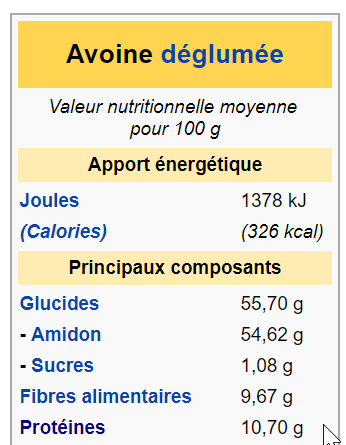

--------

# Question 5
Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids. 
Étonnamment, il arrive que ce ratio soit différent en fonction du pays. Il faudra donc réaliser pour chaque aliment une moyenne sur les différents pays. Vous créerez donc une nouvelle table grâce à une agrégation. Attention à bien retirer les valeurs égales à 0 afin de ne pas fausser le calcul de la moyenne.
Citez 5 aliments parmi les 20 aliments les plus riches en protéines.

In [32]:
q4_result.head()

,country,item,"(value, Population totale)",food,feed,waste,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,food_supply_kcalayear,protein_supply_quantity_kgayear,ratio_kcalakg,ratio_protakg
0,Armenia,Wheat and products,2977,389,93,32,vegetal,554,1024,30.52,1112683520000,33163184.60,2860.368946,8.525240
1,Armenia,Barley and products,2977,0,137,15,vegetal,198,0,0.00,0,0.00,NaN,NaN
2,Armenia,Maize and products,2977,0,96,7,vegetal,102,0,0.01,0,10866.05,NaN,NaN
3,Armenia,Rye and products,2977,0,1,0,vegetal,1,1,0.02,1086605000,21732.10,NaN,NaN
4,Armenia,Oats,2977,1,4,0,vegetal,6,2,0.09,2173210000,97794.45,2173.210000,9.779445


In [33]:
q5_result = q4_result.groupby('item').agg("mean").sort_values('ratio_kcalakg', ascending=False)

In [34]:
q5_result[['ratio_kcalakg']].head(20)

,ratio_kcalakg
item,
"Fish, Body Oil",9003.715504
Palmkernel Oil,8826.979763
Ricebran Oil,8727.700518
Palm Oil,8721.172690
Maize Germ Oil,8662.278512
"Oilcrops Oil, Other",8630.601679
Cottonseed Oil,8612.988561
Soyabean Oil,8573.634352
Rape and Mustard Oil,8503.550297


In [35]:
q52_result = q4_result.groupby('item').agg("mean").sort_values('ratio_protakg', ascending=False)

In [36]:
q52_result[['ratio_protakg']].head(20)

,ratio_protakg
item,
Soyabeans,28.575796
Groundnuts (Shelled Eq),25.125585
Peas,22.308001
"Pulses, Other and products",21.820033
Beans,21.554109
"Offals, Edible",17.562798
Sesame seed,17.497933
"Meat, Other",17.407527
"Oilcrops, Other",15.571429


--------

# Question 6 
Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.
CORRECTION reprendre le calcul avec domestic et ratio pour obtenir une qte kcal 


In [37]:
q6_result = q4_result.query('origin=="vegetal"')
q6_result = q6_result[q6_result.country != 'China']

In [38]:
q6_result.head()

,country,item,"(value, Population totale)",food,feed,waste,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,food_supply_kcalayear,protein_supply_quantity_kgayear,ratio_kcalakg,ratio_protakg
0,Armenia,Wheat and products,2977,389,93,32,vegetal,554,1024,30.52,1112683520000,33163184.60,2860.368946,8.525240
1,Armenia,Barley and products,2977,0,137,15,vegetal,198,0,0.00,0,0.00,NaN,NaN
2,Armenia,Maize and products,2977,0,96,7,vegetal,102,0,0.01,0,10866.05,NaN,NaN
3,Armenia,Rye and products,2977,0,1,0,vegetal,1,1,0.02,1086605000,21732.10,NaN,NaN
4,Armenia,Oats,2977,1,4,0,vegetal,6,2,0.09,2173210000,97794.45,2173.210000,9.779445


In [39]:
q6_result['total_kcal'] = q6_result['domestic_supply_quantity'] * q6_result['ratio_kcalakg'] * 1000000

In [40]:
total_bis = q6_result['total_kcal'].sum()
total_bis

1.2312091265143276e+16

--------

# Question 7 
Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [41]:
total_veg_food_prot = q6_result['protein_supply_quantity_kgayear'].sum()

In [42]:
q6_result['total_prot'] = q6_result['domestic_supply_quantity'] * q6_result['ratio_protakg'] * 1000000 / 100
total_veg_prot_bis = q6_result['total_prot'].sum()
total_veg_prot_bis

290177334142.1352

In [43]:
total_pop = world_population

http://www.fao.org/3/x8200f/X8200F03.htm
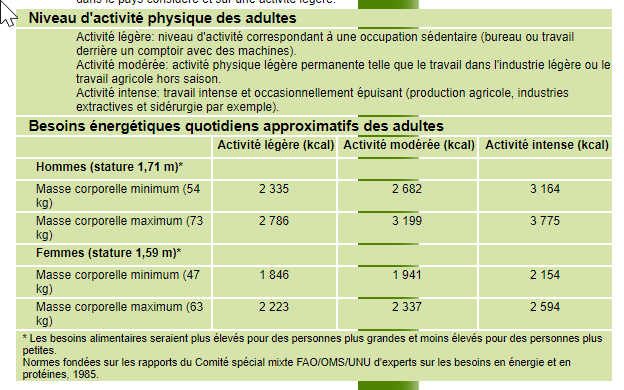
On realise la moyenne homme femme pour une activite moyenne et une carrure moyenne

In [44]:
yearly_req_kcal_a_person = (3200 * 0.5 + 2337 * 0.5) * 365
yearly_req_kcal_a_person

1010502.5

https://fr.wikipedia.org/wiki/Prot%C3%A9ine#Quantit%C3%A9s_recommand%C3%A9es
Les besoins moyens en protéines ont été définis par la FAO qui recommande 49 g de protéines pour les hommes adultes et 41 pour les femmes (47 si enceintes, 58,5 si allaitantes).

In [45]:
yearly_req_protkg_a_person = (49 * 0.5 + 41 * 0.5) * 365 * 0.001
yearly_req_protkg_a_person

16.425

In [46]:
people_fed_kcalbis = total_bis / yearly_req_kcal_a_person
people_fed_kcalbis

12184127466.427126

In [47]:
percent_fed_kcalbis = 100 * people_fed_kcalbis / total_pop
percent_fed_kcalbis

174.12547973936225

In [48]:
people_fed_prot_bis = total_veg_prot_bis / yearly_req_protkg_a_person
people_fed_prot_bis

17666808775.776875

In [49]:
percent_fed_prot_bis = 100 * people_fed_prot_bis / total_pop
percent_fed_prot_bis

252.47942965322574

--------

# Question 8
Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux (Food) la nourriture végétale destinée aux animaux (Feed) et les pertes de produits végétaux (Waste) étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [50]:
food_veg = q6_result["food"]
feed_veg = q6_result["feed"]
waste_veg = q6_result["waste"]
food_all_kg = (food_veg + feed_veg + waste_veg) * 1000000

In [51]:
ratio_kcalakg = q6_result["ratio_kcalakg"]
ratio_protakg = q6_result["ratio_protakg"] 

In [52]:
q6_result["veg_domestic_supply_energy_all"] = food_all_kg  * ratio_kcalakg
q6_result["veg_domestic_supply_prot_all"] = food_all_kg * ratio_protakg / 100

In [53]:
total_veg_food_kcal_all = q6_result['veg_domestic_supply_energy_all'].sum()
total_veg_food_prot_all = q6_result['veg_domestic_supply_prot_all'].sum()

In [54]:
people_fed_kcal = total_veg_food_kcal_all / yearly_req_kcal_a_person
people_fed_kcal

9077922765.128698

In [55]:
percent_kcal_all = 100 * people_fed_kcal / total_pop
percent_kcal_all

129.73416938311433

In [56]:
people_fed_prot = total_veg_food_prot_all / yearly_req_protkg_a_person
people_fed_prot

12394707139.74917

In [57]:
percent_prot_all = 100 * people_fed_prot / total_pop
percent_prot_all

177.1349103893283

--------

# Question 9 
Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [58]:
q4_result = q4_result[q4_result.country != 'China']
domestic_supply_world = q4_result["food"] * 1000000
ratio_kcalakg = q4_result["ratio_kcalakg"]
ratio_protakg = q4_result["ratio_protakg"]

In [59]:
q4_result["domestic_supply_energy_all"] = domestic_supply_world * ratio_kcalakg
q4_result["domestic_supply_prot_all"] = domestic_supply_world * ratio_protakg / 100

/Users/ShaM/.local/share/virtualenvs/OCR_DA_proj3-xP2tVtFg/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ShaM/.local/share/virtualenvs/OCR_DA_proj3-xP2tVtFg/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
total_food_kcal_all = q4_result['domestic_supply_energy_all'].sum()
total_food_prot_all = q4_result['domestic_supply_prot_all'].sum()

In [61]:
total_people_fed_kcal = total_food_kcal_all / yearly_req_kcal_a_person
total_people_fed_kcal

7283855900.668232

In [62]:
percent_total_fed_kcal = 100 * total_people_fed_kcal / total_pop
percent_total_fed_kcal

104.09484852739793

In [63]:
total_people_fed_prot = total_food_prot_all / yearly_req_protkg_a_person
total_people_fed_prot

12611598690.222221

In [64]:
percent_total_fed_prot = 100 * total_people_fed_prot / total_pop
percent_total_fed_prot

180.23454517085844

Projection 2050: 9,2 milliards. La production actuelle necessiterait:

In [65]:
new_percent_kcal = 100 * total_people_fed_kcal / 9200000000
new_percent_kcal

79.17234674639383

In [66]:
new_percent_prot = 100 * total_people_fed_prot / 9200000000
new_percent_prot

137.0825944589372

--------

# Question 10
A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?



In [67]:
# Loading csv file
undernourrished = pd.read_csv("undernourrished.csv")

In [68]:
undernourrished.columns = ["xx","xx2","country_code","country",'xx3','element'
    ,'item_code','item','xx4',"year","unit","value",'xx5','xx6', 'note'
]


In [69]:
undernourrished

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,xx5,xx6,note
0,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,7.9,F,FAO estimate,NaN
1,FSI,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,0.2,F,FAO estimate,NaN
2,FSI,Suite of Food Security Indicators,4,Algeria,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,1.7,F,FAO estimate,NaN
3,FSI,Suite of Food Security Indicators,5,American Samoa,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,NaN,NV,Data not available,NaN
4,FSI,Suite of Food Security Indicators,6,Andorra,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,NaN,NV,Data not available,NaN
5,FSI,Suite of Food Security Indicators,7,Angola,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,8.1,F,FAO estimate,NaN
6,FSI,Suite of Food Security Indicators,8,Antigua and Barbuda,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,NaN,NV,Data not available,NaN
7,FSI,Suite of Food Security Indicators,9,Argentina,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,1.5,F,FAO estimate,NaN
8,FSI,Suite of Food Security Indicators,1,Armenia,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,0.1,F,FAO estimate,NaN
9,FSI,Suite of Food Security Indicators,10,Australia,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,NaN,NR,Not reported,NaN


In [70]:
undernourrished.loc[(undernourrished['value'] == "<0.1"), 'value'] = 0.1

In [71]:
undernourrished.head()

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,xx5,xx6,note
0,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,7.9,F,FAO estimate,NaN
1,FSI,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,0.2,F,FAO estimate,NaN
2,FSI,Suite of Food Security Indicators,4,Algeria,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,1.7,F,FAO estimate,NaN
3,FSI,Suite of Food Security Indicators,5,American Samoa,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,NaN,NV,Data not available,NaN
4,FSI,Suite of Food Security Indicators,6,Andorra,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,NaN,NV,Data not available,NaN


In [72]:
undernourrished.shape

(204, 15)

In [73]:
len(undernourrished['country_code'].unique())

204

In [74]:
undernourrished = undernourrished[undernourrished.country != 'China']

In [75]:
undernourrished_total = undernourrished['value'].astype(float).sum() * 1000000
undernourrished_total

746000000.0

In [76]:
undernourrished_percent = undernourrished_total / world_population * 100
undernourrished_percent

10.661215441441488

In [77]:
undernourrished['value_float'] = undernourrished['value'].astype(float)
top_country = undernourrished.sort_values('value_float', ascending=False).head(10)
top_country.loc[:,['country', 'value_float']]

/Users/ShaM/.local/share/virtualenvs/OCR_DA_proj3-xP2tVtFg/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,value_float
86,India,216.3
40,"China, mainland",136.6
138,Pakistan,38.1
14,Bangladesh,26.1
65,Ethiopia,25.3
87,Indonesia,22.6
194,United Republic of Tanzania,16.4
145,Philippines,14.0
133,Nigeria,13.4
190,Uganda,12.6


---------------
Établissez la liste des produits (ainsi que leur code) considéré comme des céréales selon la FAO.

Repérez dans vos données les informations concernant les céréales (par exemple en créant une colonne de type booléen nommée "is_cereal").

# Question 11
En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

In [78]:
# Loading csv file
cereals = pd.read_csv("cereals.csv")
cereals

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balance Sheets,2,Afghanistan,5511,Production,2511,Wheat and products,2013,2013,1000 tonnes,5169.00,S,Standardized data
1,FBS,Food Balance Sheets,2,Afghanistan,5611,Import Quantity,2511,Wheat and products,2013,2013,1000 tonnes,1173.00,S,Standardized data
2,FBS,Food Balance Sheets,2,Afghanistan,5072,Stock Variation,2511,Wheat and products,2013,2013,1000 tonnes,-350.00,S,Standardized data
3,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2511,Wheat and products,2013,2013,1000 tonnes,5992.00,S,Standardized data
4,FBS,Food Balance Sheets,2,Afghanistan,5527,Seed,2511,Wheat and products,2013,2013,1000 tonnes,322.00,S,Standardized data
5,FBS,Food Balance Sheets,2,Afghanistan,5123,Losses,2511,Wheat and products,2013,2013,1000 tonnes,775.00,S,Standardized data
6,FBS,Food Balance Sheets,2,Afghanistan,5142,Food,2511,Wheat and products,2013,2013,1000 tonnes,4895.00,S,Standardized data
7,FBS,Food Balance Sheets,2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2013,2013,kg,160.23,Fc,Calculated data
8,FBS,Food Balance Sheets,2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2013,2013,kcal/capita/day,1369.00,Fc,Calculated data
9,FBS,Food Balance Sheets,2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2013,2013,g/capita/day,36.91,Fc,Calculated data


In [79]:
cereals_list = cereals.groupby('Item Code')['Item Code'].unique().tolist()

In [80]:
cereals_list

[array([2511]),
 array([2513]),
 array([2514]),
 array([2515]),
 array([2516]),
 array([2517]),
 array([2518]),
 array([2520]),
 array([2805])]

In [81]:
cereals_list = [ int(str(item).strip('[').strip(']')) for item in cereals_list]

In [82]:
cereals_list

[2511, 2513, 2514, 2515, 2516, 2517, 2518, 2520, 2805]

In [83]:
q11_result = temp 
q11_result

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,xx5,xx6,origin
0,FBS,Food Balance Sheets,2,Afghanistan,5511,Production,2731,Bovine Meat,2013,2013,1000 tonnes,134.00,S,Standardized data,animal
1,FBS,Food Balance Sheets,2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2013,2013,1000 tonnes,6.00,S,Standardized data,animal
2,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal
3,FBS,Food Balance Sheets,2,Afghanistan,5142,Food,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal
4,FBS,Food Balance Sheets,2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2013,2013,kg,4.59,Fc,Calculated data,animal
5,FBS,Food Balance Sheets,2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2013,2013,kcal/capita/day,27.00,Fc,Calculated data,animal
6,FBS,Food Balance Sheets,2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2013,2013,g/capita/day,1.89,Fc,Calculated data,animal
7,FBS,Food Balance Sheets,2,Afghanistan,5511,Production,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal
8,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal
9,FBS,Food Balance Sheets,2,Afghanistan,5142,Food,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal


In [84]:
q11_result["is_cereal"] = False

In [85]:
q11_result

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,xx5,xx6,origin,is_cereal
0,FBS,Food Balance Sheets,2,Afghanistan,5511,Production,2731,Bovine Meat,2013,2013,1000 tonnes,134.00,S,Standardized data,animal,False
1,FBS,Food Balance Sheets,2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2013,2013,1000 tonnes,6.00,S,Standardized data,animal,False
2,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal,False
3,FBS,Food Balance Sheets,2,Afghanistan,5142,Food,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal,False
4,FBS,Food Balance Sheets,2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2013,2013,kg,4.59,Fc,Calculated data,animal,False
5,FBS,Food Balance Sheets,2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2013,2013,kcal/capita/day,27.00,Fc,Calculated data,animal,False
6,FBS,Food Balance Sheets,2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2013,2013,g/capita/day,1.89,Fc,Calculated data,animal,False
7,FBS,Food Balance Sheets,2,Afghanistan,5511,Production,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False
8,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False
9,FBS,Food Balance Sheets,2,Afghanistan,5142,Food,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False


In [86]:
for code in cereals_list:
    q11_result.loc[q11_result['item_code'] == code, 'is_cereal'] = True

In [87]:
q11_result.query('item_code == 2515')

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,xx5,xx6,origin,is_cereal
397,FBS,Food Balance Sheets,3,Albania,5511,Production,2515,Rye and products,2013,2013,1000 tonnes,3.00,S,Standardized data,vegetal,True
398,FBS,Food Balance Sheets,3,Albania,5611,Import Quantity,2515,Rye and products,2013,2013,1000 tonnes,0.00,S,Standardized data,vegetal,True
399,FBS,Food Balance Sheets,3,Albania,5072,Stock Variation,2515,Rye and products,2013,2013,1000 tonnes,0.00,S,Standardized data,vegetal,True
400,FBS,Food Balance Sheets,3,Albania,5911,Export Quantity,2515,Rye and products,2013,2013,1000 tonnes,0.00,S,Standardized data,vegetal,True
401,FBS,Food Balance Sheets,3,Albania,5301,Domestic supply quantity,2515,Rye and products,2013,2013,1000 tonnes,3.00,S,Standardized data,vegetal,True
402,FBS,Food Balance Sheets,3,Albania,5527,Seed,2515,Rye and products,2013,2013,1000 tonnes,0.00,S,Standardized data,vegetal,True
403,FBS,Food Balance Sheets,3,Albania,5123,Losses,2515,Rye and products,2013,2013,1000 tonnes,1.00,S,Standardized data,vegetal,True
404,FBS,Food Balance Sheets,3,Albania,5142,Food,2515,Rye and products,2013,2013,1000 tonnes,2.00,S,Standardized data,vegetal,True
405,FBS,Food Balance Sheets,3,Albania,645,Food supply quantity (kg/capita/yr),2515,Rye and products,2013,2013,kg,0.69,Fc,Calculated data,vegetal,True
406,FBS,Food Balance Sheets,3,Albania,664,Food supply (kcal/capita/day),2515,Rye and products,2013,2013,kcal/capita/day,5.00,Fc,Calculated data,vegetal,True


In [88]:
q11_feed = q11_result.query('element == "Feed" & is_cereal == True')
q11_feed

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,xx5,xx6,origin,is_cereal
23,FBS,Food Balance Sheets,2,Afghanistan,5521,Feed,2513,Barley and products,2013,2013,1000 tonnes,360.0,S,Standardized data,vegetal,True
34,FBS,Food Balance Sheets,2,Afghanistan,5521,Feed,2514,Maize and products,2013,2013,1000 tonnes,200.0,S,Standardized data,vegetal,True
347,FBS,Food Balance Sheets,3,Albania,5521,Feed,2511,Wheat and products,2013,2013,1000 tonnes,18.0,S,Standardized data,vegetal,True
360,FBS,Food Balance Sheets,3,Albania,5521,Feed,2805,Rice (Milled Equivalent),2013,2013,1000 tonnes,0.0,S,Standardized data,vegetal,True
374,FBS,Food Balance Sheets,3,Albania,5521,Feed,2513,Barley and products,2013,2013,1000 tonnes,7.0,S,Standardized data,vegetal,True
388,FBS,Food Balance Sheets,3,Albania,5521,Feed,2514,Maize and products,2013,2013,1000 tonnes,361.0,S,Standardized data,vegetal,True
411,FBS,Food Balance Sheets,3,Albania,5521,Feed,2516,Oats,2013,2013,1000 tonnes,25.0,S,Standardized data,vegetal,True
420,FBS,Food Balance Sheets,3,Albania,5521,Feed,2517,Millet and products,2013,2013,1000 tonnes,0.0,S,Standardized data,vegetal,True
424,FBS,Food Balance Sheets,3,Albania,5521,Feed,2518,Sorghum and products,2013,2013,1000 tonnes,0.0,S,Standardized data,vegetal,True
431,FBS,Food Balance Sheets,3,Albania,5521,Feed,2520,"Cereals, Other",2013,2013,1000 tonnes,0.0,S,Standardized data,vegetal,True


In [89]:
q11_food = q11_result.query('element == "Food" & is_cereal == True')


In [90]:
q11_feed_total = q11_feed['value'].sum()
q11_food_total = q11_food['value'].sum()

In [91]:
percent = q11_feed_total * 100 / (q11_food_total + q11_feed_total)
percent

46.30652303481541

------------

Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition, pour une année choisie.

Repérez les 15 produits les plus exportés par ce groupe de pays sur l'année choisie.

Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné sur l'année choisie)

Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)

In [92]:
undernourrished.astype({'value': 'float64'}).dtypes

xx               object
xx2              object
country_code      int64
country          object
xx3               int64
element          object
item_code         int64
item             object
xx4               int64
year             object
unit             object
value           float64
xx5              object
xx6              object
note            float64
value_float     float64
dtype: object

In [93]:
undernourrished = undernourrished[undernourrished['value'].notnull()]

In [94]:
undernourrished.head()

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,xx5,xx6,note,value_float
0,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,7.9,F,FAO estimate,NaN,7.9
1,FSI,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,0.2,F,FAO estimate,NaN,0.2
2,FSI,Suite of Food Security Indicators,4,Algeria,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,1.7,F,FAO estimate,NaN,1.7
5,FSI,Suite of Food Security Indicators,7,Angola,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,8.1,F,FAO estimate,NaN,8.1
7,FSI,Suite of Food Security Indicators,9,Argentina,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,1.5,F,FAO estimate,NaN,1.5


In [95]:
q12_temp  = pd.merge(undernourrished, temp, on='country_code')

In [96]:
q12_temp

,xx_x,xx2_x,country_code,country_x,xx3_x,element_x,item_code_x,item_x,xx4_x,year_x,...,item_code_y,item_y,xx4_y,year_y,unit_y,value_y,xx5_y,xx6_y,origin,is_cereal
0,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2731,Bovine Meat,2013,2013,1000 tonnes,134.00,S,Standardized data,animal,False
1,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2731,Bovine Meat,2013,2013,1000 tonnes,6.00,S,Standardized data,animal,False
2,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal,False
3,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal,False
4,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2731,Bovine Meat,2013,2013,kg,4.59,Fc,Calculated data,animal,False
5,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2731,Bovine Meat,2013,2013,kcal/capita/day,27.00,Fc,Calculated data,animal,False
6,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2731,Bovine Meat,2013,2013,g/capita/day,1.89,Fc,Calculated data,animal,False
7,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False
8,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False
9,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,...,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False


In [97]:
q12_temp.columns

Index(['xx_x', 'xx2_x', 'country_code', 'country_x', 'xx3_x', 'element_x',
       'item_code_x', 'item_x', 'xx4_x', 'year_x', 'unit_x', 'value_x',
       'xx5_x', 'xx6_x', 'note', 'value_float', 'xx_y', 'xx2_y', 'country_y',
       'xx3_y', 'element_y', 'item_code_y', 'item_y', 'xx4_y', 'year_y',
       'unit_y', 'value_y', 'xx5_y', 'xx6_y', 'origin', 'is_cereal'],
      dtype='object')

In [98]:
q12_export = q12_temp.query('element_y == "Export Quantity"')
q12_export = q12_export.loc[:, ["item_code_y","item_y", "value_y"]]
q12_export.head()

,item_code_y,item_y,value_y
64,2848,Milk - Excluding Butter,0.0
112,2514,Maize and products,0.0
137,2531,Potatoes and products,41.0
167,2745,Honey,0.0
175,2549,"Pulses, Other and products",0.0


In [99]:
q12_table1 = q12_export.groupby(['item_code_y', 'item_y']).agg('sum').sort_values('value_y', ascending=False)
q12_table2 = q12_table1.head(15)

q12_table2.reset_index(level=0, inplace=True)
q12_table2

,item_code_y,value_y
item_y,,
Palm Oil,2577,46324.0
Maize and products,2514,37906.0
Cassava and products,2532,35851.0
Rice (Milled Equivalent),2805,33093.0
Sugar (Raw Equivalent),2542,26098.0
Wheat and products,2511,25342.0
"Vegetables, Other",2605,20139.0
Bananas,2615,17988.0
Milk - Excluding Butter,2848,14973.0


In [100]:
most_exported_items = q12_table2['item_code_y'].tolist()
most_exported_items.sort()
most_exported_items

[2511,
 2514,
 2532,
 2542,
 2555,
 2577,
 2601,
 2605,
 2611,
 2615,
 2617,
 2625,
 2763,
 2805,
 2848]

In [101]:
top_imports_for_most_exported_items = food.loc[food['item_code'].isin(most_exported_items)]
top_imports_for_most_exported_items = top_imports_for_most_exported_items[top_imports_for_most_exported_items.country != 'China']
top_imports_for_most_exported_items.sort_values('import_quantity', ascending=False)

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,waste,other_uses,processing,production,protein_supply_quantity_gcapitaday,seed,stock_variation
2509,41,"China, mainland",2555,Soyabeans,2013,vegetal,75081,250,9530,5072,35,3.66,63381,604,0,59162,11951,3.29,713,0
2496,41,"China, mainland",2532,Cassava and products,2013,vegetal,33590,41,22868,2645,6,1.91,29046,138,7940,0,4585,0.05,0,0
6965,110,Japan,2514,Maize and products,2013,vegetal,14661,1,10964,1171,61,9.21,14403,3,288,2235,0,0.16,0,259
3674,59,Egypt,2511,Wheat and products,2013,vegetal,19341,191,4860,12048,1175,146.83,10331,2224,0,0,9460,35.62,217,-260
7490,117,Republic of Korea,2514,Maize and products,2013,vegetal,8749,86,6281,614,82,12.46,8755,176,47,1631,80,0.45,1,0
6069,100,India,2577,Palm Oil,2013,vegetal,8413,143,0,1631,31,1.30,8568,0,6782,0,0,0.00,0,-12
4769,79,Germany,2848,Milk - Excluding Butter,2013,animal,23999,15677,2064,21401,331,258.70,8332,30,504,0,31345,24.58,0,0
2581,41,"China, mainland",2848,Milk - Excluding Butter,2013,animal,48271,129,1608,45252,58,32.66,8207,1410,0,0,40193,3.07,0,0
6681,106,Italy,2848,Milk - Excluding Butter,2013,animal,15918,2781,524,15057,272,246.88,7695,36,301,0,11004,17.07,0,0
1333,21,Brazil,2511,Wheat and products,2013,vegetal,12059,1288,600,10620,384,53.00,7630,607,1,0,5718,10.20,231,0


In [102]:
q12_result = top_imports_for_most_exported_items.groupby('item').agg('sum')
q12_result

,country_code,item_code,year,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,waste,other_uses,processing,production,protein_supply_quantity_gcapitaday,seed,stock_variation
item,,,,,,,,,,,,,,,,,
Apples and products,21825,455358,350262,83685,18471,663,70671,1813,1709.29,20025,7027,42,5356,82165,7.82,0,-38
Bananas,20904,439320,338184,103992,21662,871,85954,3965,2390.20,19424,15295,142,1739,105747,53.68,0,481
Cassava and products,20704,422844,336171,256664,36052,87056,100637,9034,3282.05,38370,30537,35987,2459,255002,67.15,0,-656
"Fruits, Other",21825,456750,350262,205956,30165,61,185475,5469,4626.80,31963,18045,128,2878,203580,67.30,0,586
Maize and products,21825,437436,350262,955799,128787,546116,125184,30903,3690.37,122691,40701,189386,47648,1017029,771.12,6837,-55136
Milk - Excluding Butter,21825,495552,350262,748864,125098,81973,629738,30104,19715.57,116806,19099,18768,263,753035,1789.34,0,4127
"Oranges, Mandarines",21797,451703,348249,93728,37489,11,86690,1878,2865.83,35011,6891,115,52,97076,32.36,0,-865
Palm Oil,21184,438090,342210,50409,50673,0,15214,9030,374.92,48858,297,35191,3,53612,1.26,0,-1388
Pelagic Fish,21823,477999,348249,41024,23134,18817,21687,3036,1219.59,28598,0,376,0,36632,410.55,149,-1068


In [103]:
other_uses = q12_result['other_uses']
domestic = q12_result['domestic_supply_quantity']
feed = q12_result['feed']
food = q12_result['food']
q12_result['ratio_other_over_domestic'] = other_uses / domestic
q12_result['ratio_feed_over_all_food'] = feed / (feed+food)
q12_result

,country_code,item_code,year,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,waste,other_uses,processing,production,protein_supply_quantity_gcapitaday,seed,stock_variation,ratio_other_over_domestic,ratio_feed_over_all_food
item,,,,,,,,,,,,,,,,,,,
Apples and products,21825,455358,350262,83685,18471,663,70671,1813,1709.29,20025,7027,42,5356,82165,7.82,0,-38,0.000502,0.009294
Bananas,20904,439320,338184,103992,21662,871,85954,3965,2390.20,19424,15295,142,1739,105747,53.68,0,481,0.001365,0.010032
Cassava and products,20704,422844,336171,256664,36052,87056,100637,9034,3282.05,38370,30537,35987,2459,255002,67.15,0,-656,0.140211,0.463821
"Fruits, Other",21825,456750,350262,205956,30165,61,185475,5469,4626.80,31963,18045,128,2878,203580,67.30,0,586,0.000621,0.000329
Maize and products,21825,437436,350262,955799,128787,546116,125184,30903,3690.37,122691,40701,189386,47648,1017029,771.12,6837,-55136,0.198144,0.813520
Milk - Excluding Butter,21825,495552,350262,748864,125098,81973,629738,30104,19715.57,116806,19099,18768,263,753035,1789.34,0,4127,0.025062,0.115177
"Oranges, Mandarines",21797,451703,348249,93728,37489,11,86690,1878,2865.83,35011,6891,115,52,97076,32.36,0,-865,0.001227,0.000127
Palm Oil,21184,438090,342210,50409,50673,0,15214,9030,374.92,48858,297,35191,3,53612,1.26,0,-1388,0.698109,0.000000
Pelagic Fish,21823,477999,348249,41024,23134,18817,21687,3036,1219.59,28598,0,376,0,36632,410.55,149,-1068,0.009165,0.464571


In [104]:
top_3_ratio_other_uses = q12_result.sort_values('ratio_other_over_domestic', ascending=False).head(3)
top_3_ratio_other_uses.reset_index(level=0, inplace=True)
top_3_ratio_feed = q12_result.sort_values('ratio_feed_over_all_food', ascending=False).head(3)
top_3_ratio_feed.reset_index(level=0, inplace=True)

In [105]:
top_3_ratio_other_uses['item'].tolist()

['Palm Oil', 'Maize and products', 'Cassava and products']

In [106]:
top_3_ratio_feed['item'].tolist()

['Maize and products', 'Soyabeans', 'Pelagic Fish']

----------


# Question 13
Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?


In [107]:
q13_table = q11_result.query('is_cereal == True & country == "United States of America" & element == "Feed"')
q13_value = q13_table['value'].sum() * 0.1 * 1000
q13_value

14009600.0

----------

# Question 14
En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

In [108]:
temp

,xx,xx2,country_code,country,xx3,element,item_code,item,xx4,year,unit,value,xx5,xx6,origin,is_cereal
0,FBS,Food Balance Sheets,2,Afghanistan,5511,Production,2731,Bovine Meat,2013,2013,1000 tonnes,134.00,S,Standardized data,animal,False
1,FBS,Food Balance Sheets,2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2013,2013,1000 tonnes,6.00,S,Standardized data,animal,False
2,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal,False
3,FBS,Food Balance Sheets,2,Afghanistan,5142,Food,2731,Bovine Meat,2013,2013,1000 tonnes,140.00,S,Standardized data,animal,False
4,FBS,Food Balance Sheets,2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2013,2013,kg,4.59,Fc,Calculated data,animal,False
5,FBS,Food Balance Sheets,2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2013,2013,kcal/capita/day,27.00,Fc,Calculated data,animal,False
6,FBS,Food Balance Sheets,2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2013,2013,g/capita/day,1.89,Fc,Calculated data,animal,False
7,FBS,Food Balance Sheets,2,Afghanistan,5511,Production,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False
8,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False
9,FBS,Food Balance Sheets,2,Afghanistan,5142,Food,2732,Mutton & Goat Meat,2013,2013,1000 tonnes,150.00,S,Standardized data,animal,False


In [109]:
export = temp.query('country == "Thailand" & item == "Cassava and products" & element == "Export Quantity"')['value'].sum()
export

25214.0

In [110]:
production = temp.query('country == "Thailand" & item == "Cassava and products" & element == "Production"')['value'].sum()
production

30228.0

In [111]:
manioc_percent_export = 100 * export / production
manioc_percent_export

83.41272991928014

In [112]:
thai_undernourrished = undernourrished.query('country =="Thailand"')['value'].astype('float64') * 1000000
thai_undernourrished

180    5600000.0
Name: value, dtype: float64

In [113]:
population.reset_index(level=1, inplace=True)

In [114]:
thai_population_totale = population.loc[population['country']== "Thaïlande", 'value']
thai_population_totale.reset_index()
thai_population_totale = thai_population_totale['Population totale'].sum() * 1000
thai_population_totale

67011000

In [115]:
percent_thai_undernourrished = 100 * thai_undernourrished / thai_population_totale
percent_thai_undernourrished

180    8.356837
Name: value, dtype: float64

------------------------

# Question 15

Une table appelée population, contenant la population de chaque pays pour chaque année comprise entre 2012 et la dernière année disponible à la date où vous aurez consulté le site de la FAO. Elle devra contenir 4 colonnes : pays, code_pays, annee, population.
 
Proposez une clé primaire pertinente pour cette table.

In [116]:
q15_temp = pd.read_csv("q15_population.csv")
q15_table = q15_temp.loc[:, ["Country", "Country Code", "Year", "Value"]]

In [117]:
q15_table.to_csv('q15_population_ex.csv', index=False)

Cle primaire: country_code

CREATE TABLE population 
(
    id serial NOT NULL,
    pays character varying(100),
    code_pays smallint,
    annee smallint,
    population integer,
    CONSTRAINT population_pkey PRIMARY KEY (code_pays, annee)
);
 
COPY population(pays, code_pays, annee, population)
 FROM '/tmp/q15_population_ex.csv' DELIMITER ',' CSV HEADER;

---------

# Question 16
Une table appelée dispo_alim contenant pour chaque pays, pour chaque produit, et pour chaque année comprise entre 2012 et la dernière année disponible, les informations suivantes:
- la nature du produit (deux valeurs possibles : “animal” ou “végétal”)
- disponibilité alimentaire en tonnes
- disponibilité alimentaire en Kcal/personne/jour
- disponibilité alimentaire de protéines en g/personne/jour
- disponibilité alimentaire de matières grasses en g/personne/jour
Elle devra contenir ces colonnes : pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr .

Proposez une clé primaire pertinente pour cette table.

In [118]:
q16_ani = pd.read_csv("q16_ani.csv")
q16_ani['origin'] = "animal"
q16_veg = pd.read_csv("q16_veg.csv")
q16_veg['origin'] = "vegetal"
q16_temp = q16_ani.append(q16_veg)
q16_temp.columns


Index(['Domain Code', 'Domain', 'Country Code', 'Country', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'origin'],
      dtype='object')

In [119]:
q16_temp.columns = [
    'domain_code', 
    'domain', 
    'country_code', 
    'country', 
    'element_code', 
    'element', 
    'item_code', 
    'item', 
    'year_code', 
    'year', 
    'unit', 
    'value', 
    'flag', 
    'flag_description', 
    'origin'
]
q16_table = q16_temp.pivot_table(
    index = ["country", "country_code", "year", "item", "item_code", "origin"],
    columns= ["element"],
    values = ["value"]
)

In [120]:
q16_table.columns = ["domestic_supply_qty", "fat_supply_gcapitaday", "food_supply_kcalcapitaday", "protein_supply_gcapitaday"]
q16_table.reset_index(inplace=True)
q16_table

,country,country_code,year,item,item_code,origin,domestic_supply_qty,fat_supply_gcapitaday,food_supply_kcalcapitaday,protein_supply_gcapitaday
0,Afghanistan,2,2012,Apples and products,2617,vegetal,47.0,0.01,2.0,0.01
1,Afghanistan,2,2012,Bananas,2615,vegetal,48.0,0.01,3.0,0.03
2,Afghanistan,2,2012,Barley and products,2513,vegetal,519.0,0.21,23.0,0.71
3,Afghanistan,2,2012,Beer,2656,vegetal,3.0,NaN,0.0,0.00
4,Afghanistan,2,2012,"Beverages, Alcoholic",2658,vegetal,0.0,NaN,0.0,NaN
5,Afghanistan,2,2012,Bovine Meat,2731,animal,153.0,2.36,30.0,2.13
6,Afghanistan,2,2012,"Butter, Ghee",2740,animal,35.0,2.61,23.0,0.03
7,Afghanistan,2,2012,"Cereals, Other",2520,vegetal,0.0,0.00,0.0,0.00
8,Afghanistan,2,2012,"Citrus, Other",2614,vegetal,19.0,0.00,0.0,0.01
9,Afghanistan,2,2012,Cocoa Beans and products,2633,vegetal,1.0,0.05,1.0,0.01


In [121]:
q16_table.to_csv('q16_dispo_alim.csv', index=False)

country_code item_code year


CREATE TABLE dispo_alim 
(
    id serial NOT NULL,
    pays character varying(100),
    code_pays smallint,
    annee smallint,
    produit character varying(100),
    code_produit smallint,
    origin character varying(100),
    dispo_alim_tonnes float8, 
    dispo_alim_kcal_p_j float8,
    dispo_prot float8,
    dispo_mat_gr float8,
    CONSTRAINT dispo_alim_pkey PRIMARY KEY (code_pays, code_produit, annee)
);
 
COPY dispo_alim(pays, code_pays, annee, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr)
 FROM '/tmp/q16_dispo_alim.csv' DELIMITER ',' CSV HEADER;

-------

# Question 17 
Une table appelée equilibre_prod contenant pour chaque pays, pour chaque produit, et pour chaque année comprise entre 2012 et la dernière année disponible, les quantités suivantes :
- disponibilité intérieure
- aliments pour animaux
- semences
- pertes
- transformés
- nourriture
- autres utilisations

Elle devra contenir ces colonnes : pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.

Proposez une clé primaire pertinente pour cette table.

In [122]:
q17_temp = pd.read_csv("q17_food_feed_other.csv")
q17_temp.columns

Index(['Domain Code', 'Domain', 'Country Code', 'Country', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')

In [123]:
q17_temp.columns = [
    'domain_code', 
    'domain', 
    'country_code', 
    'country', 
    'element_code', 
    'element', 
    'item_code', 
    'item', 
    'year_code', 
    'year', 
    'unit', 
    'value', 
    'flag', 
    'flag_description', 
]
q17_table = q17_temp.pivot_table(
    index = ["country", "country_code", "year", "item", "item_code"],
    columns= ["element"],
    values = ["value"]
)
q17_table.columns

MultiIndex(levels=[['value'], ['Domestic supply quantity', 'Feed', 'Food', 'Losses', 'Other uses', 'Processing', 'Seed']],
           codes=[[0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6]],
           names=[None, 'element'])

In [124]:
q17_table.columns = ["domestic_supply_qty", "feed", "food", "losses", "other_uses", "proceeding", "seed"]
q17_table.reset_index(inplace=True)
q17_table.describe()

,country_code,year,item_code,domestic_supply_qty,feed,food,losses,other_uses,proceeding,seed
count,30956.000000,30956.000000,30956.000000,30956.000000,5514.000000,28214.000000,8658.000000,11142.000000,4656.000000,4230.000000
mean,126.734074,2012.500000,2628.595749,760.952998,580.284367,432.543773,123.383114,167.527553,1051.016753,81.242553
std,75.030959,0.500008,87.904258,10229.752878,5078.920974,5937.601725,1251.107158,4987.954598,10693.997627,556.695115
min,1.000000,2012.000000,2511.000000,-3872.000000,0.000000,-246.000000,0.000000,0.000000,-21.000000,0.000000
25%,63.000000,2012.000000,2558.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121.000000,2012.500000,2612.000000,7.000000,4.000000,5.000000,4.000000,0.000000,5.000000,2.000000
75%,189.000000,2013.000000,2732.000000,79.000000,77.000000,54.000000,27.000000,5.000000,71.000000,18.000000
max,351.000000,2013.000000,2848.000000,739267.000000,153802.000000,430046.000000,55047.000000,347309.000000,326711.000000,18052.000000


In [125]:
q17_table.to_csv('q17_equilibre_prod.csv', index=False)

country_code item_code year

CREATE TABLE equilibre_prod 
(
    id serial NOT NULL,
    pays character varying(100),
    code_pays smallint,
    annee smallint,
    produit character varying(100),
    code_produit smallint,
    dispo_int float8,
    alim_ani float8,
    nourriture float8,
    pertes float8,
    autres_utilisations float8,
    transfo float8,
    semences float8,
    CONSTRAINT equilibre_prod_pkey PRIMARY KEY (code_pays, code_produit, annee)
);
 
COPY equilibre_prod(pays, code_pays, annee, produit, code_produit, dispo_int, alim_ani, nourriture, pertes, autres_utilisations, transfo, semences)
 FROM '/tmp/q17_equilibre_prod.csv' DELIMITER ',' CSV HEADER;

---------

# Question 18
Une table appelée sous_nutrition, contenant le nombre de personnes en sous-alimentation pour chaque pays et pour chaque année comprise entre 2012 et la dernière année disponible. Elle devra contenir 4 colonnes : pays, code_pays, année, nb_personnes.

Vous vous en doutez... proposez encore une fois une clé primaire pertinente pour cette table !

In [126]:
q18_temp = pd.read_csv("q18_undernourrished.csv")
q18_temp.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description', 'Note'],
      dtype='object')

In [127]:
q18_temp.columns = [
    'domain_code', 
    'domain', 
    'country_code', 
    'country', 
    'element_code', 
    'element', 
    'item_code', 
    'item', 
    'year_code', 
    'year', 
    'unit', 
    'value', 
    'flag', 
    'flag_description',
    'note' 
]
q18_temp

,domain_code,domain,country_code,country,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description,note
0,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20112013,2011-2013,millions,7.1,F,FAO estimate,NaN
1,FSI,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,7.9,F,FAO estimate,NaN
2,FSI,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-y...,20112013,2011-2013,millions,0.2,F,FAO estimate,NaN
3,FSI,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,0.2,F,FAO estimate,NaN
4,FSI,Suite of Food Security Indicators,4,Algeria,6132,Value,210011,Number of people undernourished (million) (3-y...,20112013,2011-2013,millions,1.9,F,FAO estimate,NaN
5,FSI,Suite of Food Security Indicators,4,Algeria,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,1.7,F,FAO estimate,NaN
6,FSI,Suite of Food Security Indicators,5,American Samoa,6132,Value,210011,Number of people undernourished (million) (3-y...,20112013,2011-2013,millions,NaN,NV,Data not available,NaN
7,FSI,Suite of Food Security Indicators,5,American Samoa,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,NaN,NV,Data not available,NaN
8,FSI,Suite of Food Security Indicators,6,Andorra,6132,Value,210011,Number of people undernourished (million) (3-y...,20112013,2011-2013,millions,NaN,NV,Data not available,NaN
9,FSI,Suite of Food Security Indicators,6,Andorra,6132,Value,210011,Number of people undernourished (million) (3-y...,20122014,2012-2014,millions,NaN,NV,Data not available,NaN


In [128]:
q18_temp.loc[(q18_temp['value'] == "<0.1"), 'value'] = 0.1

In [129]:
q18_temp.reset_index(inplace=True)
q18_temp.columns

Index(['index', 'domain_code', 'domain', 'country_code', 'country',
       'element_code', 'element', 'item_code', 'item', 'year_code', 'year',
       'unit', 'value', 'flag', 'flag_description', 'note'],
      dtype='object')

In [130]:
q18_table = q18_temp.loc[:,["country", "country_code", "year", "value"]]
q18_table.columns

Index(['country', 'country_code', 'year', 'value'], dtype='object')

In [131]:
q18_table.to_csv('q18_sous_nutrition.csv', index=False)

-------

country_code year

CREATE TABLE sous_nutrition 
(
    id serial NOT NULL,
    pays character varying(100),
    code_pays smallint,
    annee character varying(100),
    nb_personnes float8,
    CONSTRAINT sous_nutrition_pkey PRIMARY KEY (code_pays, annee)
);
 
COPY sous_nutrition(pays, code_pays, annee, nb_personnes)
 FROM '/tmp/q18_sous_nutrition.csv' DELIMITER ',' CSV HEADER;

-----------


# Question 19    

Écrivez les requêtes SQL permettant de connaître…
- Les 10 pays ayant le plus haut **ratio disponibilité alimentaire/habitant** en termes de proteines (kg) par habitant, **puis** en termes de kcal par habitant.
- Pour chaque année disponible, les 10 pays ayant le plus faible **ratio disponibilité alimentaire/habitant** en termes de protéines (en kg) par habitant. Le nombre de lignes de la table renvoyée sera donc égal à 10 fois le nombre d'années disponibles.
- La quantité totale (en kg) de produits perdus par pays et par année. La table renvoyée contiendra donc une ligne par couple (pays, année).
- Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte.
- Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé.

SELECT pays, SUM(365 *(dispo_prot)/1000) AS ratio_disp_kg 
FROM dispo_alim 
GROUP BY pays
ORDER BY ratio_disp_kg DESC 
LIMIT 10;
           pays           | ratio_disp_kg 
--------------------------+---------------
 Austria                  |       2739.69
 Belgium                  |      2718.885
 Turkey                   |       2699.54
 United States of America |      2688.955
 Israel                   |       2632.38
 Ireland                  |      2628.365
 Italy                    |      2610.845
 Luxembourg               |      2584.565
 Egypt                    |      2583.105
 Germany                  |      2556.095
(10 rows)

SELECT pays, SUM(365 *(dispo_alim_kcal_p_j)/1000) AS ratio_disp_kcal
FROM dispo_alim 
GROUP BY pays
ORDER BY ratio_disp_kcal DESC 
LIMIT 10;

           pays           | ratio_disp_kcal 
--------------------------+-----------------
 Austria                  |        123.3992
 United States of America |        118.0337
 Belgium                  |        117.9461
 France                   |       115.62835
 Italy                    |       114.05885
 Switzerland              |       111.13885
 Australia                |        110.6461
 Israel                   |        110.0402
 Iceland                  |        109.9161
 Norway                   |       109.10945
(10 rows)


(SELECT pays, annee, SUM(365 *(dispo_prot)/1000) AS ratio_disp_kg 
FROM dispo_alim
WHERE annee = 2012
GROUP BY pays, annee
ORDER BY ratio_disp_kg ASC 
LIMIT 10)
UNION
(SELECT pays, annee, SUM(365 *(dispo_prot)/1000) AS ratio_disp_kg 
FROM dispo_alim
WHERE annee = 2013
GROUP BY pays, annee
ORDER BY ratio_disp_kg ASC 
LIMIT 10);

                 pays                  | annee | ratio_disp_kg 
---------------------------------------+-------+---------------
 Ethiopia                              |  2012 |       774.165
 Haiti                                 |  2013 |       762.485
 Democratic People's Republic of Korea |  2012 |       767.595
 Democratic People's Republic of Korea |  2013 |       763.945
 Afghanistan                           |  2013 |       761.755
 Central African Republic              |  2013 |       685.835
 Zambia                                |  2013 |        702.26
 Zimbabwe                              |  2013 |       771.245
 Timor-Leste                           |  2012 |       783.655
 Central African Republic              |  2012 |        770.88
 Chad                                  |  2013 |       769.785
 Haiti                                 |  2012 |       759.565
 Madagascar                            |  2012 |        750.44
 Timor-Leste                           |  2013 |       777.085
 Zambia                                |  2012 |       701.165
 Madagascar                            |  2013 |        750.44
 Chad                                  |  2012 |        775.26
 Afghanistan                           |  2012 |         766.5
 Uganda                                |  2013 |        775.99
 Namibia                               |  2012 |        784.02

SELECT pays, annee, SUM(pertes) as total_pertes
FROM equilibre_prod
GROUP BY pays, annee
ORDER BY pays, annee ASC;


- Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte.

SELECT ss.pays, ss.annee, (100*(ss.nb_personnes * 1000) / (pop.population)) as ratio_ss_nutr
FROM sous_nutrition as ss JOIN population as pop
ON ss.code_pays = pop.code_pays
WHERE ss.nb_personnes IS NOT NULL AND pop.annee = 2013 and ss.annee LIKE '2012-2014'
ORDER BY ratio_ss_nutr DESC
LIMIT 10;
                 pays                  |   annee   |  ratio_ss_nutr   
---------------------------------------+-----------+------------------
 Dominica                              | 2012-2014 | 138.888888888889
 Kiribati                              | 2012-2014 | 98.0392156862745
 Saint Vincent and the Grenadines      | 2012-2014 |  91.743119266055
 Samoa                                 | 2012-2014 | 52.6315789473684
 Sao Tome and Principe                 | 2012-2014 | 51.8134715025907
 Haiti                                 | 2012-2014 | 50.4022487157119
 Zambia                                | 2012-2014 | 48.1463649494463
 Zimbabwe                              | 2012-2014 |  46.643109540636
 Central African Republic              | 2012-2014 | 43.3275563258232
 Democratic People's Republic of Korea | 2012-2014 | 42.5788310905804
 
 
 Probleme a cause de l'approx des pays a moins de 100000 habitants ou la valeur choisie est arrondie a 100000

- Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé.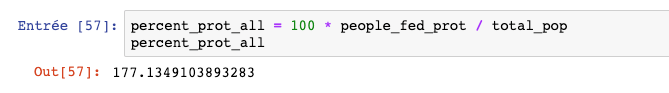
SELECT produit, (100 * NULLIF(SUM(autres_utilisations), NULL) / NULLIF(SUM(dispo_int),0) ) as ratio
FROM equilibre_prod
GROUP BY produit
ORDER BY ratio DESC
LIMIT 10;

        produit        |      ratio       
-----------------------+------------------
 Meat, Aquatic Mammals |                 
 Alcohol, Non-Food     | 100.132422637301
 Oilcrops Oil, Other   | 78.3346806790622
 Palmkernel Oil        | 71.3218927263589
 Palm Oil              | 68.3838984027882
 Cloves                | 65.4135338345865
 Rape and Mustard Oil  | 58.3427699276254
 Soyabean Oil          | 49.8529613851862
 Fish, Body Oil        | 46.0131332082552
 Fats, Animals, Raw    | 45.8482768665004



------

# Question 20

Pour quelques uns des produits identifiés dans cette dernière requête SQL, supposez quelles sont ces "autres utilisations" possibles (recherchez sur internet !)